In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, copy, random, warnings


import yfinance as yf                 #!pip install yfinance


# select asset

In [2]:

ticker_strings = 'AAL AAPL ABEV ACI AEO AFRM AMC AMD APA AQN AR ATVI AUY BA BABA BAC BB BBD BCRX BEKE BHC BILI BKR BMY BP BTG BTI C CCL CHPT CIG CIT CLF CMCSA COTY CPG CPNG CRM CSCO CSX CVE CVS CVX DAL DIDI DKNG DVN DWAC EDU EQT ET EXC F FB FCX FTI FUBO GGB GM GOLD GPS GRAB HAL HBAN HOOD HPE IBM INFY INTC IQ ITUB JD JPM KEY KGC KMI KO KOS KR LAC LCID LI LU LUMN LVS LYG M MARA MO MRK MRO MRVL MSFT MTTR MU NCLH NIO NKE NKLA NLY NOK NU NVDA ONON OPEN OTLY OXY PACB PBR PBR-A PCG PDD PFE PG PINS PLTR PLUG PTON PYPL QCOM QS RBLX RF RIG RIOT RIVN RYCEY SAN SBUX SE SIRI SKLZ SLB SNAP SOFI SPCE SQ SU SWN T TAL TCOM TLRY TME TSLA TSM TTWO TWTR UAL UBER V VALE VIAC VIPS VORB VTRS VZ WFC WMB X XOM XPEV YMM ZIM ZNGA'
ticker_list = ticker_strings.split()
print(len(ticker_list))


#np.random.seed(5)
assets = random.sample(ticker_list, 40)
#assets = ["AAPL", "MSFT", "AMZN","GOOGL", "V", "^IXIC", "BB", "CSCO", "GOLD", "NKE", "AMD", "EXC"] 



165


# asset prices downloading ...

[*********************100%***********************]  40 of 40 completed


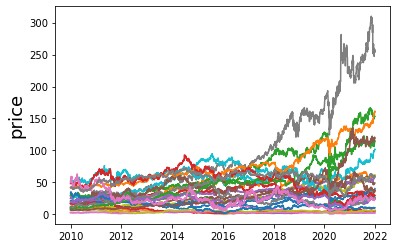

,AEO,BMY,BP,BTI,CIG,CMCSA,CPG,CRM,CSCO,CVS,...,NOK,OXY,PBR-A,PG,SBUX,SLB,SU,TSM,X,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,10.659755,16.728951,29.412718,16.296398,2.886609,6.547668,27.709454,18.442499,17.000511,24.806587,...,8.458992,52.230953,33.440025,41.399155,9.313449,48.049904,24.892879,7.553656,49.878342,41.748661
2010-01-04,10.703703,16.980715,30.011436,16.435005,2.945748,6.627732,27.960085,18.705000,17.533112,25.399609,...,8.788135,53.354549,34.576008,41.733746,9.309411,49.541069,25.915096,7.646097,52.403015,42.336411
2010-01-05,11.042706,16.715702,30.224531,16.417362,2.995296,6.537904,27.812654,18.625000,17.454990,25.299482,...,8.722306,52.969322,34.244675,41.747410,9.527509,49.681347,26.274635,7.613082,52.330639,42.501701
2010-01-06,11.023866,16.709078,30.381817,16.364435,2.961731,6.491035,28.277050,18.592501,17.341372,25.076145,...,8.656477,53.604935,34.560226,41.549381,9.458847,50.788628,26.796335,7.586669,54.656212,42.869049
2010-01-07,10.684869,16.722330,30.371666,16.475334,2.893002,6.627732,27.746311,18.510000,17.419487,26.000322,...,8.768385,53.206886,34.008022,41.324039,9.434615,51.312759,26.443830,7.335762,55.117737,42.734352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,23.452837,60.413647,26.263720,34.971699,2.168966,49.167557,5.128971,258.299988,61.489910,100.744537,...,6.313583,29.454357,10.180000,159.168091,112.209633,29.503149,24.248793,120.788132,23.562471,60.007713
2021-12-28,23.735521,60.471840,26.195980,35.132427,2.196421,49.206520,5.306513,255.449997,61.596569,101.108559,...,6.273750,29.295359,10.210000,160.023026,113.535858,29.770102,24.229401,120.158104,23.264339,59.813797
2021-12-29,25.158676,60.413647,26.118565,35.274239,2.150662,49.284462,5.128971,254.539993,62.013481,102.023514,...,6.263792,29.076736,9.990000,161.349686,114.331604,29.315294,23.967617,119.518242,23.145086,59.290222


In [3]:
start_date = "2010-01-01"
end_date = "2022-01-01"


prices = yf.download(assets, start=start_date, end=end_date)['Adj Close']
prices = prices.dropna(axis=1)                    # axis=1,0 : Drop columns,rows which contain missing value.
prices = prices.sort_values(by='Date')

assets = prices.columns.values.tolist()           # assets for which prices are downloaded

fontsize = 18
plt.plot(prices)
plt.ylabel('price',fontsize=fontsize)
plt.show()



prices

# asset retuns, covariance, and correlation
for annual return, we take periods = trading days in a year = 252

number of assets = n = 28


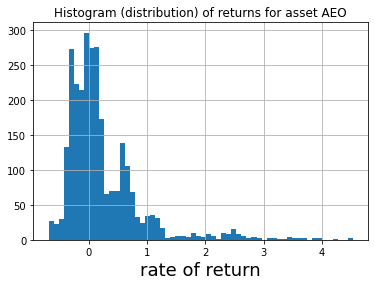

,AEO,BMY,BP,BTI,CIG,CMCSA,CPG,CRM,CSCO,CVS,EXC,GGB,JPM,KGC,KO,LVS,LYG,M,NOK,OXY,PBR-A,PG,SBUX,SLB,SU,TSM,X,XOM
AEO,0.434626,-0.010381,0.042180,-0.006181,0.013786,0.030886,0.294949,0.026913,0.050588,0.030942,0.028222,0.174512,0.075105,-0.047602,0.012182,-0.022910,0.080127,0.313296,-0.016785,0.149318,0.042987,-0.015014,0.026814,0.099473,0.063856,0.089800,0.296555,0.072554
BMY,-0.010381,0.038027,-0.006800,0.014384,-0.042591,0.004375,0.002601,0.004237,-0.005646,0.026072,-0.013272,-0.048892,-0.000744,-0.022832,0.000489,0.010270,0.020969,0.006756,0.021374,-0.003787,-0.056738,-0.002726,0.011456,0.006214,-0.009649,0.000891,-0.037784,-0.003595
BP,0.042180,-0.006800,0.052743,0.003054,0.040169,0.008821,0.084173,0.003780,0.026088,0.004558,0.020261,0.060912,0.032729,-0.031461,0.004627,0.023158,0.048577,0.092386,0.038294,0.076995,0.065967,-0.002578,-0.001888,0.050943,0.054781,-0.006109,0.100704,0.039955
BTI,-0.006181,0.014384,0.003054,0.033972,-0.003578,0.015561,0.037741,-0.001488,-0.012789,0.013502,-0.004359,0.004602,0.004738,0.004031,0.006664,0.025500,0.005860,0.010928,-0.011666,0.011676,-0.003830,-0.001242,0.006410,0.025007,0.011344,0.015022,0.014175,0.014242
CIG,0.013786,-0.042591,0.040169,-0.003578,0.192357,0.025519,0.066555,-0.014430,0.014530,-0.022630,0.036369,0.154104,0.013098,0.009900,0.014039,0.027717,-0.015382,0.050011,-0.002582,0.037699,0.181895,0.026499,0.014514,0.029922,0.038109,0.001070,0.141658,0.035584
CMCSA,0.030886,0.004375,0.008821,0.015561,0.025519,0.035632,0.050943,0.004565,0.000292,0.013361,-0.002997,0.026557,0.018296,-0.021918,0.008834,0.027440,0.044353,0.036183,0.007759,0.018609,0.013728,0.009596,0.019171,0.030839,0.017664,0.013881,0.038923,0.021311
CPG,0.294949,0.002601,0.084173,0.037741,0.066555,0.050943,0.521745,0.011220,0.035082,0.057597,0.044938,0.204976,0.095310,0.000744,0.022482,0.044760,0.127101,0.391782,0.065551,0.253268,0.102276,0.003907,0.042533,0.196179,0.136161,0.105447,0.403445,0.137261
CRM,0.026913,0.004237,0.003780,-0.001488,-0.014430,0.004565,0.011220,0.051516,-0.000774,-0.003645,-0.003167,0.003075,0.008658,-0.010221,0.000909,0.041335,0.027253,0.017071,0.021399,0.014464,-0.010658,-0.005754,0.002651,0.015986,0.016647,0.012313,0.007075,0.002756
CSCO,0.050588,-0.005646,0.026088,-0.012789,0.014530,0.000292,0.035082,-0.000774,0.044375,0.003746,0.014543,0.041195,0.029020,-0.023957,-0.002163,-0.011951,0.043571,0.057475,0.035295,0.038764,0.039259,0.002856,-0.002540,0.014065,0.022488,-0.000794,0.064996,0.013491
CVS,0.030942,0.026072,0.004558,0.013502,-0.022630,0.013361,0.057597,-0.003645,0.003746,0.045970,-0.003660,-0.038749,0.007758,-0.052531,0.002822,-0.005967,0.037895,0.079331,0.031977,0.030192,-0.050125,-0.002511,0.016472,0.031285,0.005717,0.002402,0.006539,0.017179


In [4]:
                                                                           
retun_df = prices.pct_change(periods=252).dropna(how="all")                  # rate of return = [p_(t+1)-p_t]/p_t
#retun_df = np.log(1 + prices.pct_change(periods=252)).dropna(how="all")     # log_return


n = retun_df.shape[1]
print("number of assets = n =", n)  

assets_idx = 0
retun_df.T.iloc[assets_idx].hist(bins='auto')
plt.xlabel('rate of return',fontsize=fontsize )
plt.title(f"Histogram (distribution) of returns for asset {assets[assets_idx]}")  
# Histogram will look like a normal distribution if we take periods = 1
plt.show()


#------------------------------------------------------------------------------------

mu_df = retun_df.mean()                                      # expected return = sample mean
cov_df, corr_df = retun_df.cov(), retun_df.corr()            # expected risk = sample variance


cov_df.style.background_gradient()


# $ $

# mean-variance portfolio optimization

We want at least return $R\in[\min(\mu), \max(\mu)]$ from our portfolio, so the optimization task is


$\text{min}\ x^T \Sigma x $

$\text{such that}\ x \succeq \textbf{0},\ \mu^T x \geq R,\ $ and $\ \textbf{1}^T x  = 1.$

$ $

$\preceq$ and $\succeq$ are componentwise vector inequalities. 
$\Sigma = \text{covariance matrix},$ 
$\mu = \text{expected return vector},$
$\textbf{1}$ is a column vector of 1s,
and $x$ is a vector of portfolio weights.


$ $

In [5]:
min_mu = np.min(mu_df)
max_mu = np.max(mu_df)


R = (max_mu + min_mu)/2

print(f"min_mu = {round(min_mu,2)}")
print("R =", round(R,2))
print(f"max_mu = {round(max_mu,2)}\n")
                       
                                 
print(f"Is R in between min_mu and max_mu : {min_mu <= R<= max_mu} \n")

print(mu_df)

min_mu = -0.02
R = 0.15
max_mu = 0.32

Is R in between min_mu and max_mu : True 

AEO      0.222602
BMY      0.137460
BP       0.033137
BTI      0.076577
CIG      0.071700
CMCSA    0.213471
CPG     -0.018300
CRM      0.257850
CSCO     0.129534
CVS      0.132268
EXC      0.064591
GGB      0.071147
JPM      0.183743
KGC      0.022846
KO       0.098604
LVS      0.143884
LYG      0.068056
M        0.184239
NOK      0.049937
OXY      0.025930
PBR-A    0.028163
PG       0.117654
SBUX     0.259193
SLB      0.007526
SU       0.029788
TSM      0.319365
X        0.174831
XOM      0.055084
dtype: float64


# portfolio return and risk, gradient and Hessian for minimization of the convex objective function with log-barrier to take care of inequality constraints 


$\text{minimize objective function}\ = f(x) = \ t\;(x^T \Sigma x) -[\textbf{1}^T\ln(x) + \ln(\mu^T x - R)] $

$\text{such that}\ \textbf{1}^T x  = 1$

$ $

gradient $= \nabla f = 2\; t\; \Sigma\; x - \frac{1}{x} - \frac{1}{\mu^T x - R}\;\mu$

Hessian $= \nabla^2 f = 2\; t\; \Sigma - \text{diag}(\frac{1}{x^2}) - \frac{1}{(\mu^T x - R)^2}\;\mu\mu^T$



$\frac{1}{x}$ is the vector with components $\frac{1}{x_i}$ <br>
$\text{diag}(\frac{1}{x^2})$ is the diagonal matrix with diagonal-entries $\frac{1}{x^2_i}$

Parameter $t>0$ goes from 0 to $\infty$ to turn the inequality constraints from soft to hard. 

$ $

In [6]:
mu, cov, corr = mu_df.to_numpy(), cov_df.to_numpy(), corr_df.to_numpy()

ones = np.ones(n)
ones0 = np.append(ones, 0)


def portfolio_return(x):
    return (mu @ x)     

def portfolio_risk(x):
    return (x @ cov @ x)

def obj_fn(t, x):
    f = t*(x @ cov @ x) - (ones @ np.log(x) + np.log(portfolio_return(x)- R))
    return f


def grad(t, x):
    gr = 2*t*(cov @ x) -1/x -(1/(portfolio_return(x)- R))*mu
    return gr

def Hessian(t, x):
    hess = 2*t*cov + np.diag(1/(x*x)) + (1/(portfolio_return(x)- R)**2)*(mu.reshape(-1,1) @ mu.reshape(1,-1))
    return hess


def inequality_constraints(x):            
    c1 = min(x) >= 0
    c2 = portfolio_return(x) >= R
    c = c1&c2
    return c


def portfolio_perform(x):
    Return = portfolio_return(x)
    risk = np.sqrt(portfolio_risk(x))
    risk_free_rate = 0.02                            # risk_free_rate is taken 2%
    
    print(f"portfolio annual return = {100*Return:.1f} %")
    print(f"portfolio annual volatility = {100*risk:.1f} %")
    print(f"shapr ratio = {(Return-risk_free_rate)/risk:.2f}")             
    

# generateing an initial feasible (interior-point) solution: x_in



In [7]:
indices = np.where(mu>=R)[0]
print(f'indices of assets that give more return than the desired R = {indices}')


'''if there is only asset that gives more return than the desired R, 
then no optimization needed and the whole portfolio will be made of that asset only'''


#----------------------------------------------------------------------------

theta = 0.01

for i in range(300):
    x_in = np.zeros(n)
    x_in[indices]=np.random.rand(len(indices))
    
    x_in = x_in + theta*np.random.rand(n)   
    x_in = x_in/np.linalg.norm(x_in, 1)

    if portfolio_return(x_in) >= R:
        break
        

if inequality_constraints(x_in)==False or round(x_in.sum(),5)!=1:
    warnings.warn('infeasible initial solution. change theta or/and run it again')         



# obj_fn(0.5, x_in), grad(0.5, x_in), Hessian(0.5, x_in)


indices of assets that give more return than the desired R = [ 0  5  7 12 17 22 25 26]


# Iterations for Newton's method

center path $t_k = t_\text{in}\alpha^{k}$ for iterations $k = 0, 1, 2,\cdots $

in $k$th iteration $x_{k+1} = x_k + \Delta x\qquad$         where
$
\begin{pmatrix}
\Delta x \\
\nu
\end{pmatrix}
 =
\begin{pmatrix}
\nabla^2 f & \textbf{1} \\
\textbf{1}^T & 0
\end{pmatrix}^{-1}
\begin{pmatrix}
-\nabla f \\
0
\end{pmatrix}
$

for more details see the book "Convex Optimization" by Boyd and Vandenberghe.

iteration = 0   risk = 0.07
iteration = 10   risk = 0.02
iteration = 20   risk = 0.0
iteration = 30   risk = 0.0
iteration = 40   risk = 0.0
time taken in sec. =  0.02391362190246582


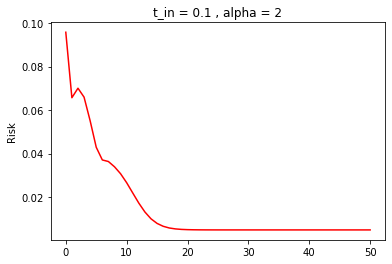

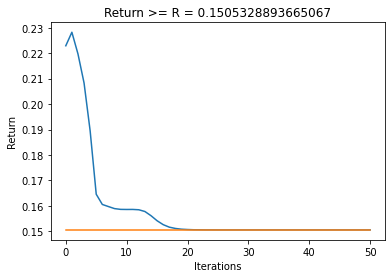

(array([], dtype=int64), array([], dtype=int64))

In [8]:
'''
one can use cvxopt [given in the end] for faster and better convergence
here one must tune hyperparameters Itrs, t_in, alpha
'''



Itrs = 50             # total Iterations

t_in = 0.1                 # must be > 0
alpha = 2           # must be > 1
t = t_in

#--------------Initialization----------------------

Sol = [x_in]                                                    # solution at different iterations
Fn = [obj_fn(t_in, x_in)]                                       # objective function value at different iterations
Rtn = [portfolio_return(x_in)]                                  # return at different iterations
Rsk = [portfolio_risk(x_in)]                                    # risk at different iterations
Consts = [[inequality_constraints(x_in), round(x_in.sum(),5)]]  # Constraints at different iterations



time_start = time.time()                                        # Start the stopwatch


#---------------------------------------------------

for k in range(Itrs): 
    
    t= alpha*t                   # we are increasing t in every itr by multiplying it with alpha > 1
    x = Sol[-1]
    
    #-----------------------------------------------------------------------------
    Hess1 = np.append(np.append(Hessian(t, x), ones.reshape(1,-1), axis=0).T, ones0.reshape(1,-1), axis=0)
    Hess1_inv = np.linalg.inv(Hess1)
    
    Grad0 = np.append(-grad(t, x), 0)
    
    dx_nu = Hess1_inv @ Grad0
    x = x + dx_nu[:-1]          # dx = dx_nu[:-1]
    
 
    if inequality_constraints(x)==False:
        print(f"iteration = {k}" )
        break
    
    #-----------------------------------------------------------------------------
    risk = portfolio_risk(x)
    
    Sol.append(x)
    Fn.append(obj_fn(t, x))
    Rtn.append(portfolio_return(x))
    Rsk.append(risk)
    Consts.append([inequality_constraints(x), round(x.sum(),5)])
    
    #-----------------------------------------------------------------------------
    
    if k % 10 == 0: 
        print(f"iteration = {k}   risk = {round(risk,2)}" )



time_taken = time.time()  - time_start                  # Stop the stopwatch 
print("time taken in sec. = ", time_taken)


#=================================================================================


plt.plot(Rsk, color='red')          # Risk must decrease
plt.ylabel('Risk')
plt.title(f"t_in = {t_in} , alpha = {alpha}")
plt.show()

plt.plot(Rtn)
plt.plot(R*np.ones(len(Rtn)))
plt.title(f"Return >= R = {R}")   # Return must be above the value R
plt.ylabel('Return')
plt.xlabel('Iterations')
plt.show()


np.where(np.array(Consts)!=1)  # empty means no equality or inequality constraint got violated



# optimized portfolio 

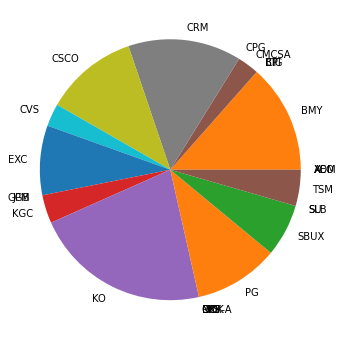

solution = [0.      0.13485 0.      0.      0.      0.02677 0.      0.14034 0.11524
 0.02802 0.08625 0.      0.      0.03505 0.21876 0.      0.      0.
 0.      0.      0.      0.10476 0.06518 0.      0.      0.04478 0.
 0.     ]

portfolio annual return = 15.1 %
portfolio annual volatility = 7.0 %
shapr ratio = 1.87


In [9]:
x_sol = Sol[-1]


plt.rcParams["figure.figsize"] = (6,6)
plt.pie(x_sol, normalize=True, labels=assets)  
plt.show()

print(f'solution = {np.round(x_sol, 5)}\n' )
portfolio_perform(x_sol)

# portfolio optimization with pypfopt

$ $

In [10]:
# https://pyportfolioopt.readthedocs.io/en/latest/index.html

from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu_df, cov_df)
weights = ef.efficient_return(target_return=R, market_neutral=False)


ef.portfolio_performance(verbose=True)

weights

Expected annual return: 15.1%
Annual volatility: 7.0%
Sharpe Ratio: 1.87


OrderedDict([('AEO', 0.0),
             ('BMY', 0.1348524155737554),
             ('BP', 0.0),
             ('BTI', 0.0),
             ('CIG', 0.0),
             ('CMCSA', 0.026770322829535),
             ('CPG', 0.0),
             ('CRM', 0.1403368324416226),
             ('CSCO', 0.1152358939638065),
             ('CVS', 0.0280200250832961),
             ('EXC', 0.0862518773340288),
             ('GGB', 0.0),
             ('JPM', 0.0),
             ('KGC', 0.0350522572558797),
             ('KO', 0.2187615348307484),
             ('LVS', 0.0),
             ('LYG', 0.0),
             ('M', 0.0),
             ('NOK', 0.0),
             ('OXY', 0.0),
             ('PBR-A', 0.0),
             ('PG', 0.1047639066370252),
             ('SBUX', 0.0651777951481718),
             ('SLB', 0.0),
             ('SU', 0.0),
             ('TSM', 0.0447771389021306),
             ('X', 0.0),
             ('XOM', 0.0)])

# cvxopt solver for quadratic programming (portfolio optimization)



$\text{min}\ \frac{1}{2}x^T P x + q^T x$

$\text{such that}\ Gx \preceq h$ and $ Ax = b$

In [11]:
# https://cvxopt.org/

from cvxopt import matrix, solvers
from cvxopt.solvers import qp

q = matrix(np.zeros((n,1)))         # a CVXOPT matrix can be created from a Numpy array


G = np.identity(n)
G = -1*np.append(G, mu.reshape(1,-1), axis=0)
G = matrix(G)

h = np.zeros(n)
h = -1*np.append(h, R).reshape(-1,1)
h = matrix(h)

A = matrix(np.ones((1,n))) 
b = matrix(1.0)

#----------------------------------------------------------

sol = qp(matrix(2*cov), q, G, h, A, b)
x_sol_cvxopt = np.array(sol['x'])  # give Numpy array


print(f"\n x_sol_cvxopt = {np.round(x_sol_cvxopt.flatten(),4)}")

     pcost       dcost       gap    pres   dres
 0:  8.5260e-03 -9.8186e-01  3e+01  6e+00  6e+00
 1:  1.7847e-02 -9.0183e-01  1e+00  9e-02  1e-01
 2:  2.0531e-02 -9.0957e-02  1e-01  1e-03  1e-03
 3:  1.2460e-02 -6.4619e-03  2e-02  1e-04  2e-04
 4:  6.9072e-03  3.0595e-03  4e-03  2e-06  2e-06
 5:  5.3020e-03  4.4734e-03  8e-04  1e-07  1e-07
 6:  4.9295e-03  4.8734e-03  6e-05  2e-09  2e-09
 7:  4.8942e-03  4.8899e-03  4e-06  1e-10  1e-10
 8:  4.8910e-03  4.8908e-03  1e-07  9e-13  1e-12
 9:  4.8909e-03  4.8909e-03  2e-09  9e-15  2e-14
Optimal solution found.

 x_sol_cvxopt = [0.     0.1348 0.     0.     0.     0.0268 0.     0.1403 0.1152 0.028
 0.0863 0.     0.     0.0351 0.2188 0.     0.     0.     0.     0.
 0.     0.1048 0.0652 0.     0.     0.0448 0.     0.    ]
